In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [3]:
def process(row):
    row = str.replace(row, '[', '')
    row = str.replace(row, ']', '')
    lst = row.split()
    return np.array(lst).astype(np.float)

def parse_df(df):
    for column in df.columns:
        df[column] = df[column].apply(process)
    return df

In [6]:
metrics = ['sil', 'ch', 'gd41', 'os']

def transform(df, cols=metrics):
    df = parse_df(df)
    means = df.sum()/len(df)
    
    res = pd.DataFrame(np.stack(means), columns=cols)
    res.index = means.index
    return res


def transform2(df, cols=metrics):
    df = parse_df(df)
        
    res = pd.DataFrame()
    for alg in df.columns:
        tmp = pd.DataFrame(np.stack(df[alg]), columns=cols)
        tmp = tmp.apply(lambda col: f"{col.mean():.3f} ± {col.std():.3f}")
        res = res.append(pd.DataFrame(tmp).transpose())
    res.index = df.columns
    return res



In [7]:
def get_metric_stats(df, metric):
    
    metric_values = pd.DataFrame()
    
    for alg in df.columns:
        metric_values[alg] = df[alg].apply(lambda a: a[metrics.index(metric)])
    return metric_values

In [8]:
df = pd.read_csv("scores.csv")
res = transform(df, metrics)
# res.to_csv("real_data_mean_scores1.csv")

In [9]:
res

In [44]:
df = pd.read_csv("scores.csv")
df = df.drop(["monti_fixed"], axis=1)
res = transform2(df, metrics)

res.to_csv("real_data_mean_std_scores.csv")
res

,sil,ch,gd41,os
k-means,0.395 ± 0.128,800.096 ± 761.416,0.059 ± 0.101,21.767 ± 77.655
lwea,0.125 ± 0.132,247.158 ± 189.042,0.035 ± 0.051,30.635 ± 121.063
monti,0.418 ± 0.145,625.724 ± 601.655,0.082 ± 0.133,127.671 ± 470.959


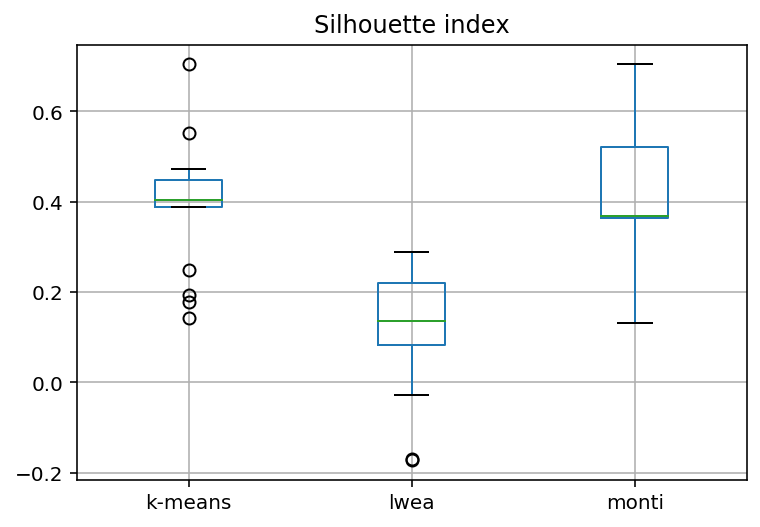

In [45]:
sils = get_metric_stats(df, 'sil')
sils.boxplot()
plt.title("Silhouette index")
plt.savefig("real_sil", dpi=300)

In [181]:
df = pd.read_csv("synt_scores.csv")
res = transform(df, metrics)
# res.to_csv("synt_data_mean_scores1.csv")

In [182]:
res

,sil,ch,gd41,os
k-means,0.606793,1618.785967,0.038419,1.328350
lwea,0.380190,764.332597,0.020270,4.360719
monti,0.608744,782.135069,0.043501,8.228966
monti_fixed,0.605910,1617.709759,0.039255,1.331596
mv,0.609748,1299.324957,0.029591,1.630093


In [25]:
df = pd.read_csv("synt_scores.csv")
res = transform2(df, metrics)
# res.to_csv("synt_data_mean_std_scores.csv")

In [26]:
res

,sil,ch,gd41,os
k-means,0.607 ± 0.111,1618.786 ± 855.850,0.038 ± 0.038,1.328 ± 0.930
lwea,0.380 ± 0.166,764.333 ± 568.652,0.020 ± 0.013,4.361 ± 9.501
monti,0.609 ± 0.128,782.135 ± 1056.082,0.044 ± 0.036,8.229 ± 7.225
monti_fixed,0.606 ± 0.111,1617.710 ± 855.793,0.039 ± 0.038,1.332 ± 0.920
mv,0.610 ± 0.125,1299.325 ± 926.113,0.030 ± 0.019,1.630 ± 3.218


In [46]:
df = parse_df(pd.read_csv("synt_scores.csv"))

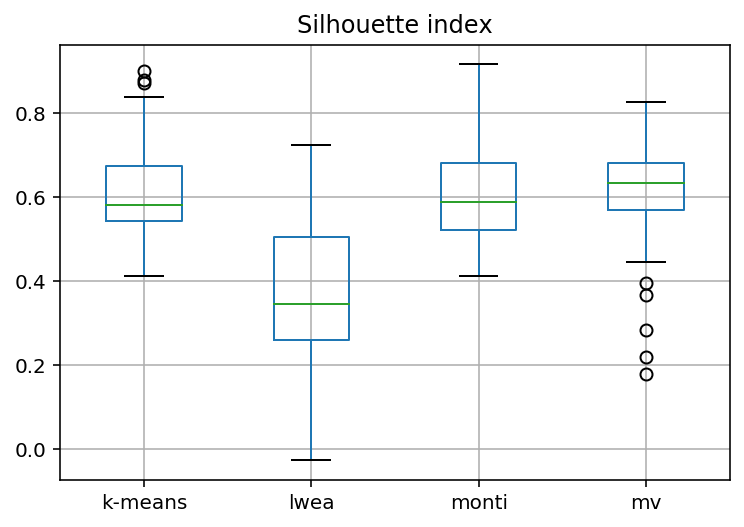

In [47]:
df = df.drop(["monti_fixed"], axis=1)
sils = get_metric_stats(df, 'sil')
sils.boxplot()
plt.title("Silhouette index")
plt.savefig("synt_sil", dpi=300)

In [51]:
df = pd.read_csv("synt_scores_final.csv")
res = transform2(df, metrics)

In [52]:
res.to_csv("smac_means.csv")
res

,sil,ch,gd41,os
k-means,0.731 ± 0.101,1767.065 ± 619.199,0.077 ± 0.043,0.284 ± 0.566
lwea,0.254 ± 0.355,605.553 ± 935.578,0.045 ± 0.046,0.480 ± 1.388
lwea_tuned,0.655 ± 0.279,1583.971 ± 738.148,0.072 ± 0.046,0.097 ± 0.165
monti,0.543 ± 0.164,631.719 ± 902.611,0.053 ± 0.039,7.317 ± 6.852
monti_tuned,0.755 ± 0.071,1698.951 ± 651.880,0.075 ± 0.044,0.735 ± 3.417


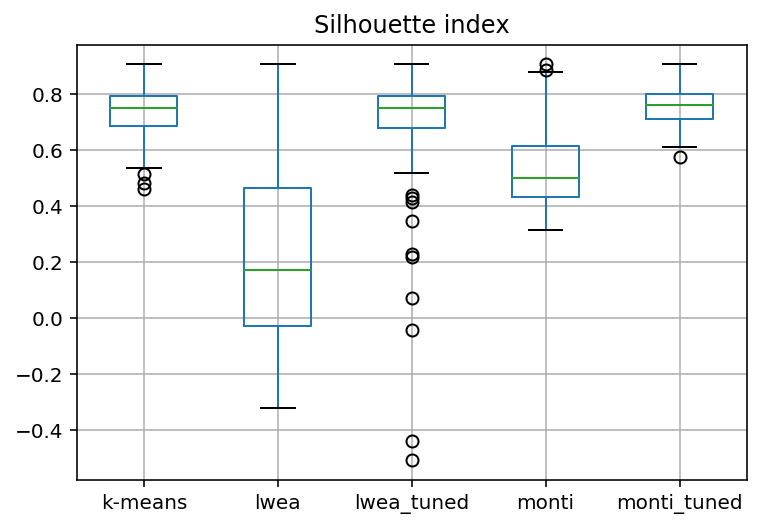

In [53]:
sils = get_metric_stats(df, 'sil')
plt.title("Silhouette index")
sils.boxplot()
plt.savefig("smac_sil", dpi=300)